# Creating a curve from training data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
URL_keys_leg = {
    "Exp2" : '1u2JN_yVS9I-aDDk-xtRFLs9SDdrUNo0f',
    "Exp3" : '1qolBHxLSiGi-bmDUZ-V0WzaCay7UaA3x',
    "Exp4(5)" : '1eEh3oZpFoCo4dGdcVoGH6kuwIe7QY6rr',
#    "Exp5" : '1P3E_T65CdJncewSVA-3H8hveejoqcdy4',
#    "Exp6(7)" : '1kFniM6vHQVy659t0I4R86xH6bfGgo97K',
#    "Exp7(8)" : '19j6veOIvJoe3aln1MURMChglvMA2F5AS',
#    "Exp8(9)" : '1akmRWg8bhkKlAQV0XimEPTzsa7_UvazU',
#    "Exp9(10)" : '1llYUn_deIMOUQl14-aJL9Gw5BqT3nH53',
#    "Exp10(11)" : '1hdnEeKw7eb2bEvJLbtd12irF3N5qIFmc'
}

classification = {
    "Exp2" : "good",
    "Exp3" : "bad",
    "Exp4(5)" : "good",
    "Exp5" : "good",
    "Exp6(7)" : "bad",
    "Exp7(8)" : "good",
    "Exp8(9)" : "good",
    "Exp9(10)" : "bad",
    "Exp10(11)" : "good"
}

In [3]:
def import_from_google (ID,name):
    google_sheet_ID=ID
    work_sheet=name
    path='https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
        google_sheet_ID,
        work_sheet
    )

    data = pd.read_csv(path)
    
    if name=="Gyroscope":
        data.columns = [c.replace(' ', '_') for c in data.columns]
        data.columns = [c.replace('_(rad/s)', '') for c in data.columns]
        data.columns = [c.replace('_(s)', '') for c in data.columns]
    else:
        data.columns = [c.replace(' ', '_') for c in data.columns]
        data.columns = [c.replace('_(m/s^2)', '') for c in data.columns]
        data.columns = [c.replace('_(s)', '') for c in data.columns]
    
    return data

def print_graph (prefix,title,graphdata):
    plt.figure(figsize=(15,5))
    if title=="Gyroscope":
        title=prefix+" "+title
        plt.title(title)
#        plt.ylim(-6,6)
        plt.plot(graphdata.index, graphdata.Gyroscope_x, color="red")
        plt.plot(graphdata.index, graphdata.Gyroscope_y, color="blue")
        plt.plot(graphdata.index, graphdata.Gyroscope_z, color="green")
        plt.show()
        
    if title=="Accelerometer":
        title=prefix+" "+title
        plt.title(title)
        plt.plot(graphdata.index, graphdata.Acceleration_x, color="red")
        plt.plot(graphdata.index, graphdata.Acceleration_y, color="blue")
        plt.plot(graphdata.index, graphdata.Acceleration_z, color="green")
        plt.show()
        
        

-------------- Experiment  Exp2 -------------
Exp2
quality= good
max= 39.22181320000001
min= -37.30286026
idx max= 639
idx min= 658
delta time= 0.18998458600000045
         Time  Gyroscope_x  Gyroscope_y  Gyroscope_z
539  5.476782     1.325492    -0.570334    -1.683618
540  5.486781     1.246690    -0.186100    -1.755700
541  5.496765     1.111078    -0.053542    -1.769750
542  5.506864     1.067096    -0.252074    -1.852828
543  5.516769     1.128183     0.009988    -1.734931
544  5.526782     1.216147     0.151708    -1.617645
545  5.536739     1.233862    -0.108520    -1.419724
546  5.546794     1.318162    -0.382799    -1.295719
547  5.556807     1.301057    -0.632643    -1.127731
548  5.566850     1.210649    -0.586217    -1.020218
         Time  Acceleration_x  Acceleration_y  Acceleration_z
539  5.389488        1.634043        3.971981       -0.245406
540  5.399523        2.626439        3.913323        1.380257
541  5.409405        1.587356        5.799953        0.428562
542  

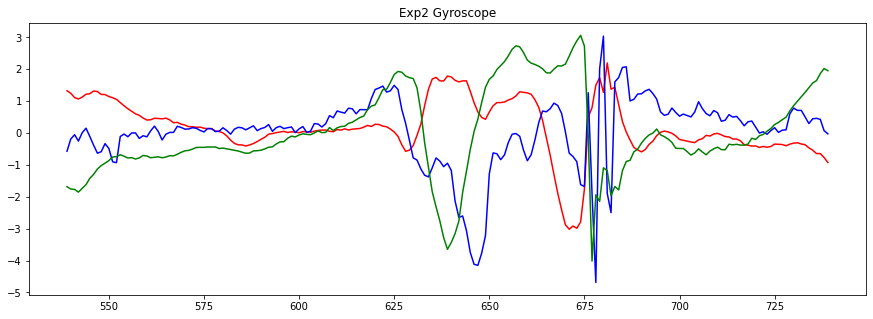

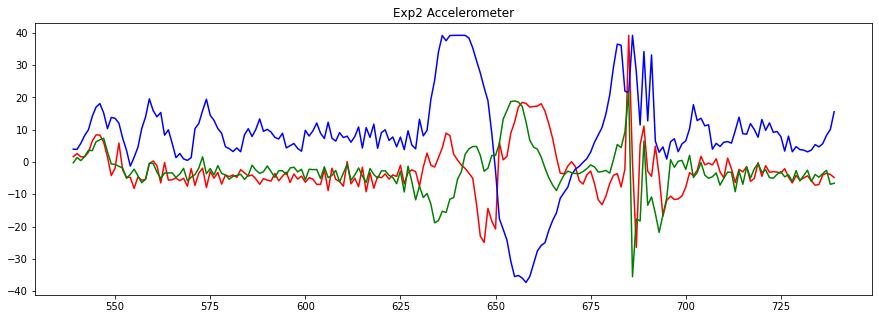

-------------- Experiment  Exp3 -------------
Exp3
quality= bad
max= 39.22181320000001
min= -38.85549927
idx max= 772
idx min= 790
delta time= 0.1801621880000006
         Time  Gyroscope_x  Gyroscope_y  Gyroscope_z
672  6.801688     0.508154    -2.128652    -0.378810
673  6.811586     0.656595    -1.347355    -0.963408
674  6.821588     0.858180    -0.613095    -1.387959
675  6.831999     1.073816    -0.357142    -1.640857
676  6.841838     1.190491    -0.537958    -1.803958
677  6.851667     1.326714    -0.592936    -2.044639
678  6.861982     1.490426    -0.378523    -2.099006
679  6.871619     1.541127    -0.290558    -2.048915
680  6.881628     1.502032    -0.109131    -1.788687
681  6.891801     1.440335     0.192025    -1.633527
         Time  Acceleration_x  Acceleration_y  Acceleration_z
672  6.719145        1.642422        7.028179       -0.191536
673  6.729403       -2.280477        6.169858       -0.775721
674  6.739237       -2.219425        4.321534        0.808043
675  6.

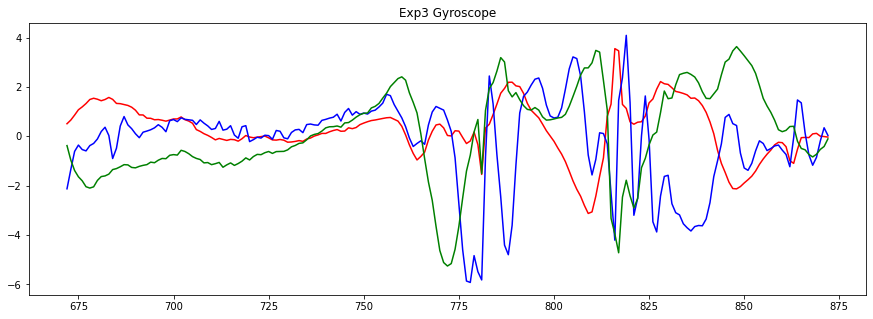

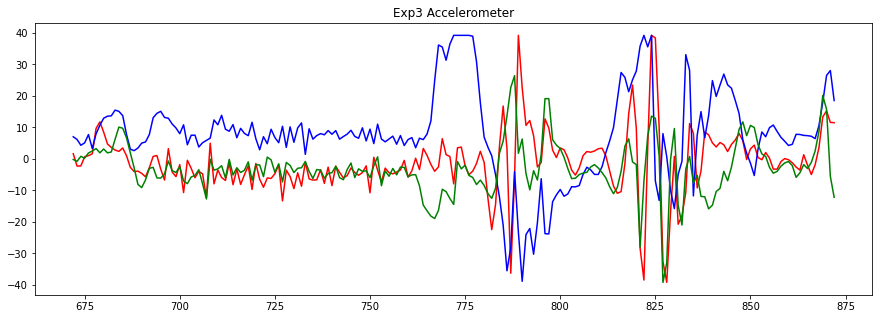

-------------- Experiment  Exp4(5) -------------
Exp4(5)
quality= good
max= 39.22181320000001
min= -37.33638
idx max= 757
idx min= 812
delta time= 0.5504225449999991
         Time  Gyroscope_x  Gyroscope_y  Gyroscope_z
657  6.649934     0.925986    -0.470152    -1.399566
658  6.659952     0.977910    -0.462211    -1.453933
659  6.670227     1.063431    -0.610041    -1.464928
660  6.679890     1.167889    -0.763368    -1.495471
661  6.689904     1.243025    -0.777418    -1.444159
662  6.700029     1.235084    -0.550787    -1.424611
663  6.710001     1.081146    -0.555063    -1.314655
664  6.719993     1.015783    -0.495809    -1.219360
665  6.730123     1.055490    -0.663186    -1.078861
666  6.739899     1.175830    -0.779861    -1.043431
         Time  Acceleration_x  Acceleration_y  Acceleration_z
657  6.568862        3.622427        8.189367        0.123301
658  6.579393        2.705448        7.042544        1.796848
659  6.589080        4.272453        9.050082        1.238999
660

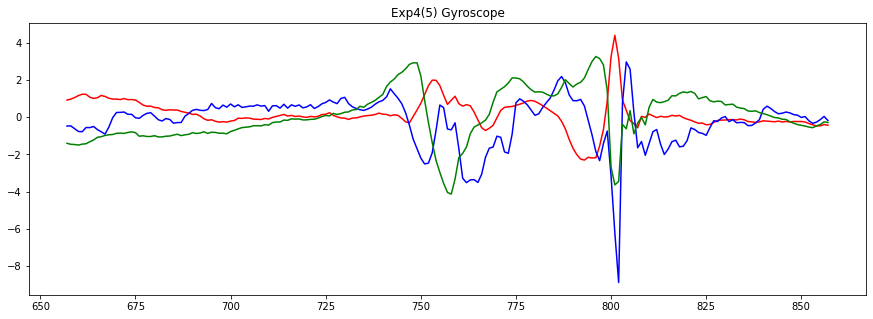

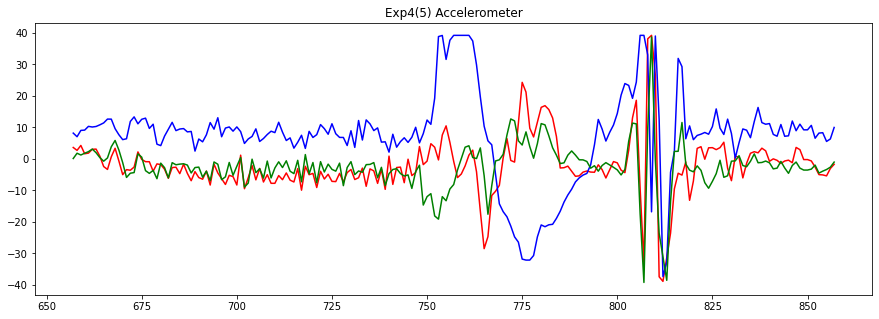

---FINAL-FINAL---
max= 99.40007305
min= 14.804546118000001
idx max= 683
idx min= 733
     Gyroscope_x  Gyroscope_y  Gyroscope_z
539          NaN          NaN          NaN
540          NaN          NaN          NaN
541          NaN          NaN          NaN
542          NaN          NaN          NaN
543          NaN          NaN          NaN
544          NaN          NaN          NaN
545          NaN          NaN          NaN
546          NaN          NaN          NaN
547          NaN          NaN          NaN
548          NaN          NaN          NaN
     Acceleration_x  Acceleration_y  Acceleration_z
539             NaN             NaN             NaN
540             NaN             NaN             NaN
541             NaN             NaN             NaN
542             NaN             NaN             NaN
543             NaN             NaN             NaN
544             NaN             NaN             NaN
545             NaN             NaN             NaN
546             NaN       

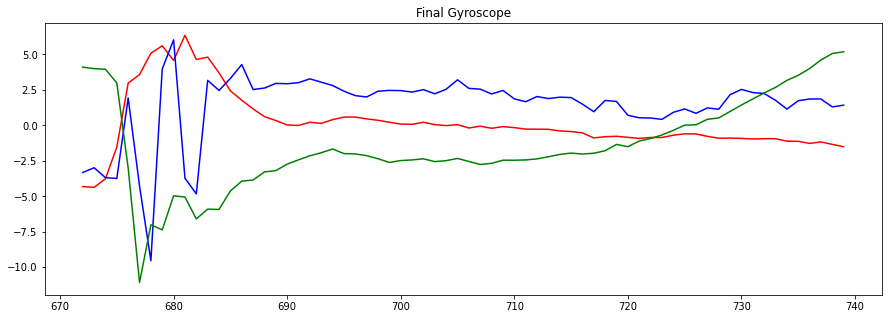

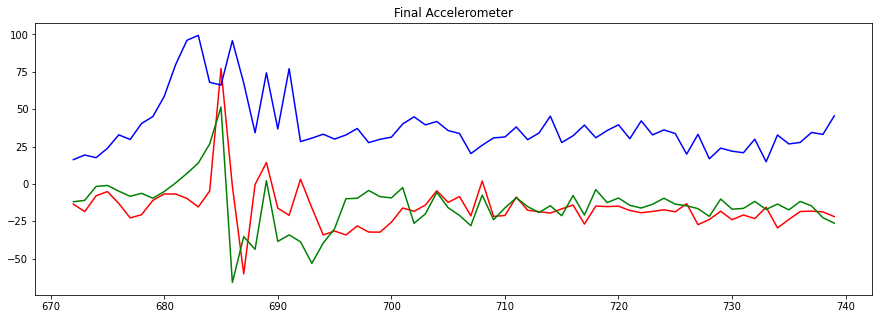

In [4]:



for i in URL_keys_leg:
    data_gyr = import_from_google(URL_keys_leg[i],"Gyroscope")
    data_acc = import_from_google(URL_keys_leg[i],"Accelerometer")

    max_acc=data_acc["Acceleration_y"].max()
    min_acc=data_acc["Acceleration_y"].min()
    idx_max_acc=data_acc["Acceleration_y"].idxmax()
    idx_min_acc=data_acc["Acceleration_y"].idxmin()
    delta_time=data_acc.loc[idx_min_acc,"Time"]-data_acc.loc[idx_max_acc,"Time"]
        
    
    graphdata_gyr=data_gyr.loc[idx_max_acc-100:idx_max_acc+100,:]
    graphdata_acc=data_acc.loc[idx_max_acc-100:idx_max_acc+100,:]
    
    
    
    if i=="Exp2":
        final_gyr=graphdata_gyr=data_gyr.loc[idx_max_acc-100:idx_max_acc+100,:]
        final_acc=data_acc.loc[idx_max_acc-100:idx_max_acc+100,:]
      
        final_gyr=graphdata_gyr.drop(columns="Time")
        final_acc=graphdata_acc.drop(columns="Time")
    
    final_gyr=final_gyr+graphdata_gyr.drop(columns="Time")
    final_acc=final_acc+graphdata_acc.drop(columns="Time")
    
        
    print("-------------- Experiment ",i,"-------------")
    print(i)
    print("quality=",classification[i])
    print("max=",max_acc)
    print("min=",min_acc)
    print("idx max=",idx_max_acc)
    print("idx min=",idx_min_acc)
    print("delta time=",delta_time)

    print(graphdata_gyr.head(n=10))
    print(graphdata_acc.head(n=10))
    print("---FINAL---")
    print(final_gyr.head(n=10))
    print(final_acc.head(n=10))
    
    print_graph(i,"Gyroscope",graphdata_gyr)
    print_graph(i,"Accelerometer",graphdata_acc)

    
#--- final ---    
max_acc=final_acc["Acceleration_y"].max()
min_acc=final_acc["Acceleration_y"].min()
idx_max_acc=final_acc["Acceleration_y"].idxmax()
idx_min_acc=final_acc["Acceleration_y"].idxmin()

    
#final_gyr=final_gyr.loc[idx_max_acc-100:idx_max_acc+100,:]        
#final_acc=final_acc.loc[idx_max_acc-100:idx_max_acc+100,:]


print("---FINAL-FINAL---")
print("max=",max_acc)
print("min=",min_acc)
print("idx max=",idx_max_acc)
print("idx min=",idx_min_acc)

print(final_gyr.head(n=10))    
print(final_acc.head(n=10))


print_graph("Final","Gyroscope",final_gyr)
print_graph("Final","Accelerometer",final_acc)

        



In [5]:
A=pd.DataFrame({"Time"})